<a href="https://colab.research.google.com/github/AkashBhardwaj9078/EDA/blob/main/incomplete_telecustomer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as  sns

In [ ]:
df=pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

FileNotFoundError: ignored

In [ ]:
p=[]
for i in df.TotalCharges:
  if i!=" ":
    p.append(float(i))
  else:
    p.append(0)


In [ ]:
df["TotalCharges"]=p

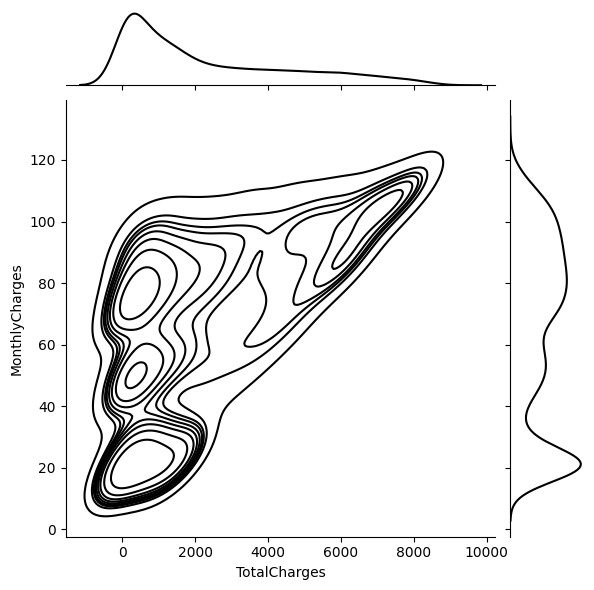

In [ ]:
sns.jointplot(x=df["TotalCharges"],y=df["MonthlyCharges"],kind="kde",color="black")

<Axes: ylabel='Contract'>

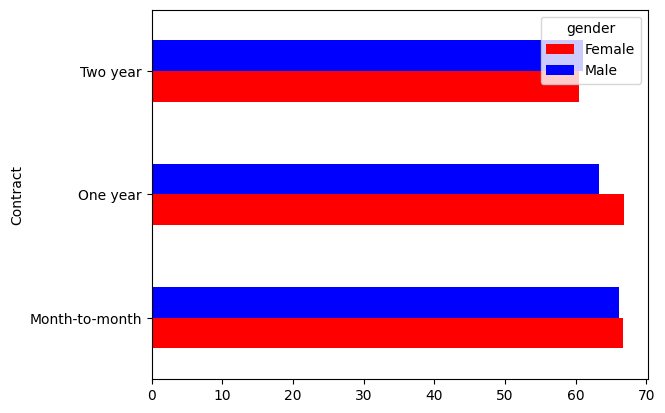

In [ ]:
df.pivot_table(index='Contract',columns='gender',values="MonthlyCharges").plot(kind='barh',color=['red','blue'])

<Axes: ylabel='Density'>

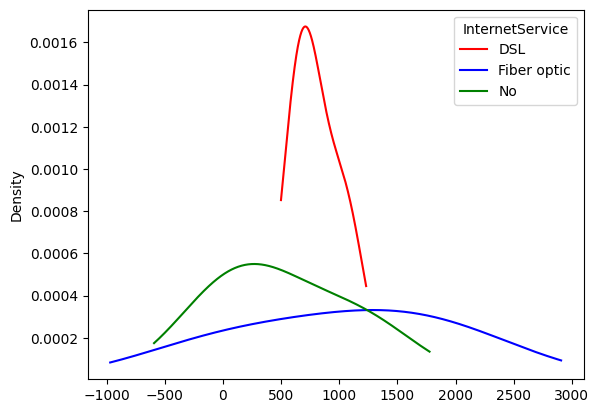

In [ ]:
pd.crosstab(df["MultipleLines"],df["InternetService"]).plot(kind="density",color=['red',"blue","green"])

In [ ]:
s=["gender","SeniorCitizen","Partner","Dependents","PhoneService","MultipleLines","InternetService"]
+df.columns[9:]

Index(['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df1=pd.get_dummies(data=df,columns=s,drop_first=True).columns[2:10]
a=pd.get_dummies(data=pd.get_dummies(data=df,columns=s,drop_first=True),columns=df1,drop_first=True).drop(columns=["PaymentMethod","Churn",	"customerID"])


In [ ]:
from sklearn.model_selection import train_test_split


TypeError: ignored

In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

TypeError: ignored

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

In [ ]:
xtr,xts,ytr,yts=train_test_split(a.values,df["Churn"],random_state=0)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

accuracy_score(DecisionTreeClassifier().fit(xtr,ytr).predict(xts),yts)

0.7467348097671778

In [ ]:
params={"min_samples":[12,14,16,18,20],"max_samples_split":[20,22,28,32],"criterion":['gini',"entropy"],'max_leaf_nodes': [12,15,20]}

In [ ]:

params={"min_samples_leaf":[12,14,16,18,20],"min_samples_split":[20,22,28,32],"criterion":['gini',"entropy"],'max_leaf_nodes': [12,15,20]}

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
DecisionTreeClassifier().get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
accuracy_score(GridSearchCV(DecisionTreeClassifier(),param_grid=params,cv=KFold(5)).fit(xtr,ytr).predict(xts),yts)

0.7802385008517888

AttributeError: ignored

In [ ]:
from sklearn.model_selection import GridSearchCV
GridSearchCV(DecisionTreeClassifier(),param_grid=params,cv=KFold(5)).fit(xtr,ytr).best_params_

{'criterion': 'entropy',
 'max_leaf_nodes': 15,
 'min_samples_leaf': 12,
 'min_samples_split': 20}

In [ ]:

from sklearn.ensemble import RandomForestRegressor
RandomForestRegressor()

RandomForestRegressor()

In [ ]:
a.drop(columns=["TotalCharges"],)

In [ ]:
a

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes
0,1,29.85,29.85,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,34,56.95,1889.50,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
2,2,53.85,108.15,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,45,42.30,1840.75,1,0,0,0,0,1,0,...,1,0,1,0,0,0,0,1,0,0
4,2,70.70,151.65,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,1990.50,1,0,1,1,1,0,1,...,1,0,1,0,1,0,1,1,0,1
7039,72,103.20,7362.90,0,0,1,1,1,0,1,...,1,0,0,0,1,0,1,1,0,1
7040,11,29.60,346.45,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
7041,4,74.40,306.60,1,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<Axes: xlabel='PaymentMethod', ylabel='tenure'>

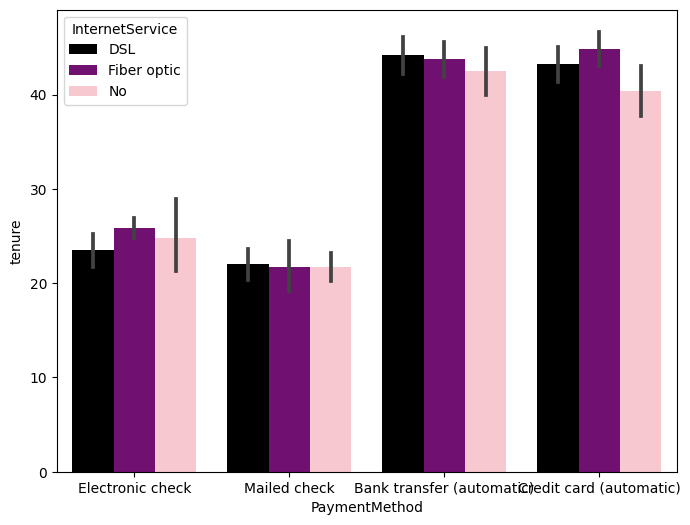

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=df['PaymentMethod'],y=df["tenure"],hue=df["InternetService"],palette=["black","purple","pink"])


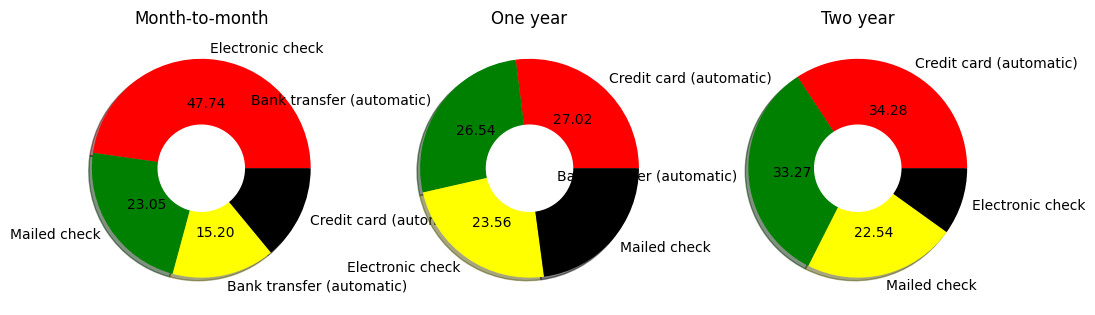

In [ ]:
k=0
plt.figure(figsize=(12,8))
for i in df.Contract.unique():
  plt.subplot(1,3,k+1)
  pdf=df[df.Contract==i]
  plt.title(f"{i}")
  plt.pie(pdf["PaymentMethod"].value_counts(),shadow=True,labels=pdf["PaymentMethod"].value_counts().index,colors=["red","green","yellow","black","orange"],autopct="%0.2f")
  plt.pie([1],colors="white",radius=0.4)
  k=k+1



Index(['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling'],
      dtype='object')

In [ ]:
df.Contract.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<Axes: ylabel='gender'>

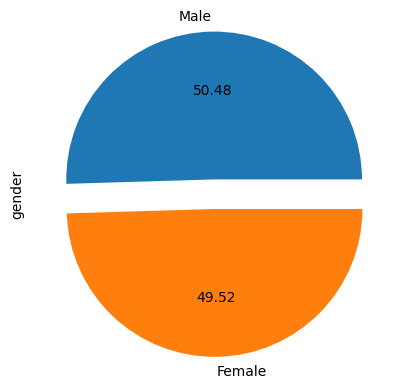

In [ ]:
df["gender"].value_counts().plot(kind='pie',autopct='%0.2f',explode=[0.1]*2)